In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import ast
import tikzplotlib
from common import analyse_results, expand_sparsity_explanation_rate_necessary, expand_sparsity_explanation_rate_sufficient, calculate_similarity_scores, heatmap, annotate_heatmap

In [2]:
sns.set_theme(style='white', palette='deep')
sns.set_context('paper', font_scale=2)

# Analyze Results for the UCIM Dataset

## 1. Data Loading

### 1.1. Load the results

In [3]:
# Load results for CoDy
cody_random = pd.read_parquet('../results/ucim/cody/results_ucim_cody_random.parquet')
cody_temporal = pd.read_parquet('../results/ucim/cody/results_ucim_cody_recent.parquet')
cody_spatio_temporal = pd.read_parquet('../results/ucim/cody/results_ucim_cody_spatio-temporal.parquet')
cody_1_delta = pd.read_parquet('../results/ucim/cody/results_ucim_cody_1-best.parquet')

cody_random_w = pd.read_parquet('../results/ucim/cody/results_ucim_cody_random_wrong_only.parquet')
cody_temporal_w = pd.read_parquet('../results/ucim/cody/results_ucim_cody_recent_wrong_only.parquet')
cody_spatio_temporal_w = pd.read_parquet('../results/ucim/cody/results_ucim_cody_spatio-temporal_wrong_only.parquet')
cody_1_delta_w = pd.read_parquet('../results/ucim/cody/results_ucim_cody_1-best_wrong_only.parquet')

In [4]:
# Load results for Greedy Baseline
greedy_random = pd.read_parquet('../results/ucim/greedy/results_ucim_greedy_random.parquet')
greedy_temporal = pd.read_parquet('../results/ucim/greedy/results_ucim_greedy_recent.parquet')
greedy_spatio_temporal = pd.read_parquet('../results/ucim/greedy/results_ucim_greedy_spatio-temporal.parquet')
greedy_1_delta = pd.read_parquet('../results/ucim/greedy/results_ucim_greedy_1-best.parquet')

greedy_random_w = pd.read_parquet('../results/ucim/greedy/results_ucim_greedy_random_wrong_only.parquet')
greedy_temporal_w = pd.read_parquet('../results/ucim/greedy/results_ucim_greedy_recent_wrong_only.parquet')
greedy_spatio_temporal_w = pd.read_parquet('../results/ucim/greedy/results_ucim_greedy_spatio-temporal_wrong_only.parquet')
greedy_1_delta_w = pd.read_parquet('../results/ucim/greedy/results_ucim_greedy_1-best_wrong_only.parquet')

In [5]:
# Load resutls from TGNNExplainer
tgnnex = pd.read_parquet('../results/ucim/tgnnexplainer/results_ucim_tgnnexplainer.parquet')

tgnnex_w = pd.read_parquet('../results/ucim/tgnnexplainer/results_ucim_tgnnexplainer_wrong_only.parquet')

### 1.2. Run analysis

In [6]:
# Analyze results for CoDy
results_cody_random = analyse_results(cody_random, 'random')
results_cody_temporal = analyse_results(cody_temporal, 'temporal')
results_cody_spatio_temporal = analyse_results(cody_spatio_temporal, 'spatio-temporal')
results_cody_1_delta = analyse_results(cody_1_delta, '1-delta')

results_cody_random_w = analyse_results(cody_random_w, 'random')
results_cody_temporal_w = analyse_results(cody_temporal_w, 'temporal')
results_cody_spatio_temporal_w = analyse_results(cody_spatio_temporal_w, 'spatio-temporal')
results_cody_1_delta_w = analyse_results(cody_1_delta_w, '1-delta')

In [7]:
# Analyze results for Greedy Baseline
results_greedy_random = analyse_results(greedy_random, 'random')
results_greedy_temporal = analyse_results(greedy_temporal, 'temporal')
results_greedy_spatio_temporal = analyse_results(greedy_spatio_temporal, 'spatio-temporal')
results_greedy_1_delta = analyse_results(greedy_1_delta, '1-delta')

results_greedy_random_w = analyse_results(greedy_random_w, 'random')
results_greedy_temporal_w = analyse_results(greedy_temporal_w, 'temporal')
results_greedy_spatio_temporal_w = analyse_results(greedy_spatio_temporal_w, 'spatio-temporal')
results_greedy_1_delta_w = analyse_results(greedy_1_delta_w, '1-delta')

In [8]:
# Analyze results for TGNNExplainer

tgnnex['cf_example_event_ids'] = tgnnex['explanation_event_ids']
tgnnex['orig_prediction_tgnnexplainer'] = tgnnex['original_prediction']
tgnnex.drop('original_prediction', axis=1, inplace=True)
tgnnex = pd.merge(tgnnex, cody_random[['explained_event_id', 'original_prediction']], how='inner', on='explained_event_id')
tgnnex['achieves_counterfactual_explanation'] = tgnnex['original_prediction'] * tgnnex['counterfactual_prediction'] < 0

tgnnex_w['cf_example_event_ids'] = tgnnex_w['explanation_event_ids']
tgnnex_w['orig_prediction_tgnnexplainer'] = tgnnex_w['original_prediction']
tgnnex_w.drop('original_prediction', axis=1, inplace=True)
tgnnex_w = pd.merge(tgnnex_w, cody_random_w[['explained_event_id', 'original_prediction']], how='inner', on='explained_event_id')
tgnnex_w['achieves_counterfactual_explanation'] = tgnnex_w['original_prediction'] * tgnnex_w['counterfactual_prediction'] < 0

results_tgnnex = analyse_results(tgnnex, '-')

results_tgnnex_w = analyse_results(tgnnex_w, '-')

### 1.3. Put data into dataframes

In [9]:
# Instantiate CoDy dataframes
for dataframe in [results_cody_random, results_cody_temporal, results_cody_spatio_temporal, results_cody_1_delta]:
    dataframe['Explainer'] = 'CoDy'
cody = pd.DataFrame([results_cody_random, results_cody_temporal, results_cody_spatio_temporal, results_cody_1_delta])
results_cody_random = pd.DataFrame([results_cody_random])
results_cody_temporal = pd.DataFrame([results_cody_temporal])
results_cody_spatio_temporal = pd.DataFrame([results_cody_spatio_temporal])
results_cody_1_delta = pd.DataFrame([results_cody_1_delta])

for dataframe in [results_cody_random_w, results_cody_temporal_w, results_cody_spatio_temporal_w, results_cody_1_delta_w]:
    dataframe['Explainer'] = 'CoDy'
cody_w = pd.DataFrame([results_cody_random_w, results_cody_temporal_w, results_cody_spatio_temporal_w, results_cody_1_delta_w])
results_cody_random_w = pd.DataFrame([results_cody_random_w])
results_cody_temporal_w = pd.DataFrame([results_cody_temporal_w])
results_cody_spatio_temporal_w = pd.DataFrame([results_cody_spatio_temporal_w])
results_cody_1_delta_w = pd.DataFrame([results_cody_1_delta_w])

In [10]:
# Instantiate Greedy Baseline dataframes
for dataframe in [results_greedy_random, results_greedy_temporal, results_greedy_spatio_temporal, results_greedy_1_delta]:
    dataframe['Explainer'] = 'Greedy'
greedy = pd.DataFrame([results_greedy_random, results_greedy_temporal, results_greedy_spatio_temporal, results_greedy_1_delta])
results_greedy_random = pd.DataFrame([results_greedy_random])
results_greedy_temporal = pd.DataFrame([results_greedy_temporal])
results_greedy_spatio_temporal = pd.DataFrame([results_greedy_spatio_temporal])
results_greedy_1_delta = pd.DataFrame([results_greedy_1_delta])

for dataframe in [results_greedy_random_w, results_greedy_temporal_w, results_greedy_spatio_temporal_w, results_greedy_1_delta_w]:
    dataframe['Explainer'] = 'Greedy'
greedy_w = pd.DataFrame([results_greedy_random_w, results_greedy_temporal_w, results_greedy_spatio_temporal_w, results_greedy_1_delta_w])
results_greedy_random_w = pd.DataFrame([results_greedy_random_w])
results_greedy_temporal_w = pd.DataFrame([results_greedy_temporal_w])
results_greedy_spatio_temporal_w = pd.DataFrame([results_greedy_spatio_temporal_w])
results_greedy_1_delta_w = pd.DataFrame([results_greedy_1_delta_w])

In [11]:
# Instantiate TGNNExplainer dataframes
results_tgnnex['Explainer'] = 'TGNNExplainer'
tgnnexplainer = pd.DataFrame([results_tgnnex])

results_tgnnex_w['Explainer'] = 'TGNNExplainer'
tgnnexplainer_w = pd.DataFrame([results_tgnnex_w])

In [12]:
# Combined datasets
correct_predictions = pd.concat([tgnnexplainer, greedy, cody])

wrong_predictions = pd.concat([tgnnexplainer_w, greedy_w, cody_w])

In [13]:
results_cody_1_delta_e_nec = expand_sparsity_explanation_rate_necessary(results_cody_1_delta)
results_cody_spatio_temporal_e_nec = expand_sparsity_explanation_rate_necessary(results_cody_spatio_temporal)
results_cody_random_e_nec = expand_sparsity_explanation_rate_necessary(results_cody_random)
results_cody_temporal_e_nec = expand_sparsity_explanation_rate_necessary(results_cody_temporal)

results_greedy_1_delta_e_nec = expand_sparsity_explanation_rate_necessary(results_greedy_1_delta)
results_greedy_spatio_temporal_e_nec = expand_sparsity_explanation_rate_necessary(results_greedy_spatio_temporal)
results_greedy_random_e_nec = expand_sparsity_explanation_rate_necessary(results_greedy_random)
results_greedy_temporal_e_nec = expand_sparsity_explanation_rate_necessary(results_greedy_temporal)

tgnnexplainer_e_nec = expand_sparsity_explanation_rate_necessary(tgnnexplainer)


results_cody_1_delta_w_e_nec = expand_sparsity_explanation_rate_necessary(results_cody_1_delta_w)
results_cody_spatio_temporal_w_e_nec = expand_sparsity_explanation_rate_necessary(results_cody_spatio_temporal_w)
results_cody_random_w_e_nec = expand_sparsity_explanation_rate_necessary(results_cody_random_w)
results_cody_temporal_w_e_nec = expand_sparsity_explanation_rate_necessary(results_cody_temporal_w)

results_greedy_1_delta_w_e_nec = expand_sparsity_explanation_rate_necessary(results_greedy_1_delta_w)
results_greedy_spatio_temporal_w_e_nec = expand_sparsity_explanation_rate_necessary(results_greedy_spatio_temporal_w)
results_greedy_random_w_e_nec = expand_sparsity_explanation_rate_necessary(results_greedy_random_w)
results_greedy_temporal_w_e_nec = expand_sparsity_explanation_rate_necessary(results_greedy_temporal_w)

tgnnexplainer_w_e_nec = expand_sparsity_explanation_rate_necessary(tgnnexplainer_w)

In [14]:
results_cody_1_delta_e_suf = expand_sparsity_explanation_rate_sufficient(results_cody_1_delta)
results_cody_spatio_temporal_e_suf = expand_sparsity_explanation_rate_sufficient(results_cody_spatio_temporal)
results_cody_random_e_suf = expand_sparsity_explanation_rate_sufficient(results_cody_random)
results_cody_temporal_e_suf = expand_sparsity_explanation_rate_sufficient(results_cody_temporal)

results_greedy_1_delta_e_suf = expand_sparsity_explanation_rate_sufficient(results_greedy_1_delta)
results_greedy_spatio_temporal_e_suf = expand_sparsity_explanation_rate_sufficient(results_greedy_spatio_temporal)
results_greedy_random_e_suf = expand_sparsity_explanation_rate_sufficient(results_greedy_random)
results_greedy_temporal_e_suf = expand_sparsity_explanation_rate_sufficient(results_greedy_temporal)

tgnnexplainer_e_suf = expand_sparsity_explanation_rate_sufficient(tgnnexplainer)


results_cody_1_delta_w_e_suf = expand_sparsity_explanation_rate_sufficient(results_cody_1_delta_w)
results_cody_spatio_temporal_w_e_suf = expand_sparsity_explanation_rate_sufficient(results_cody_spatio_temporal_w)
results_cody_random_w_e_suf = expand_sparsity_explanation_rate_sufficient(results_cody_random_w)
results_cody_temporal_w_e_suf = expand_sparsity_explanation_rate_sufficient(results_cody_temporal_w)

results_greedy_1_delta_w_e_suf = expand_sparsity_explanation_rate_sufficient(results_greedy_1_delta_w)
results_greedy_spatio_temporal_w_e_suf = expand_sparsity_explanation_rate_sufficient(results_greedy_spatio_temporal_w)
results_greedy_random_w_e_suf = expand_sparsity_explanation_rate_sufficient(results_greedy_random_w)
results_greedy_temporal_w_e_suf = expand_sparsity_explanation_rate_sufficient(results_greedy_temporal_w)

tgnnexplainer_w_e_suf = expand_sparsity_explanation_rate_sufficient(tgnnexplainer_w)

### 1.4. Set Mappings

In [15]:
explainer_mapping = {
    'CoDy': 'o',
    'Greedy': 'X',
    'TGNNExplainer': 'v'
}

selection_strategy_mapping = {
    'random': 'tab:green',
    'spatio-temporal': 'tab:red',
    'temporal': 'tab:orange',
    '1-delta': 'tab:blue',
    '-': 'k'
}

## 2. Analysis

### 2.1. Fidelity Analysis

$fid_+ = 1 - \frac{1}{N} \sum_{i = 1}^N \mathbb{1}(p(f(\mathcal{G}(t_i)), \varepsilon_i) = p(f(\mathcal{G}(t_i) \setminus \mathcal{X}_{\varepsilon_i}, \varepsilon_i)))$

$fid_- = 1 - \frac{1}{N} \sum_{i = 1}^N \mathbb{1}(p(f(\mathcal{G}(t_i)), \varepsilon_i) = p(f(\mathcal{X}_{\varepsilon_i}, \varepsilon_i)))$

$sparsity = \frac{1}{N} \sum_{i = 1}^N \frac{|\mathcal{X}_{\varepsilon_i}|}{|C(\mathcal{G}, \varepsilon_i, k, m_{max})|}$

### 2.1.1 $Fidelity_+$

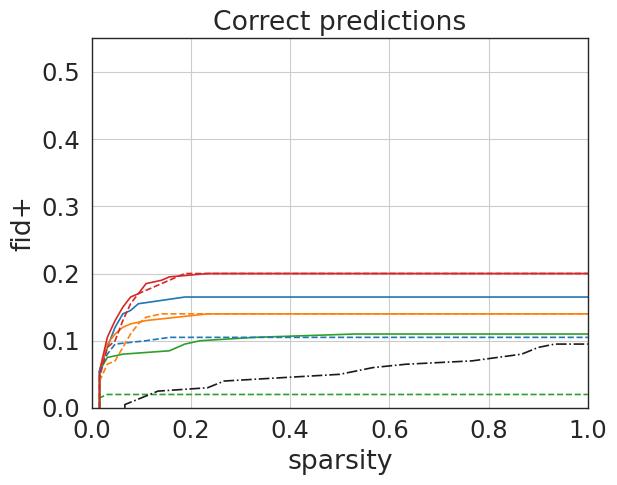

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(results_cody_1_delta_e_nec['sparsity_necessary'], results_cody_1_delta_e_nec['necessary explanation rate'], color='tab:blue')
ax.plot(results_cody_temporal_e_nec['sparsity_necessary'], results_cody_temporal_e_nec['necessary explanation rate'], color='tab:orange')
ax.plot(results_cody_random_e_nec['sparsity_necessary'], results_cody_random_e_nec['necessary explanation rate'], color='tab:green')
ax.plot(results_cody_spatio_temporal_e_nec['sparsity_necessary'], results_cody_spatio_temporal_e_nec['necessary explanation rate'], color='tab:red')

ax.plot(results_greedy_1_delta_e_nec['sparsity_necessary'], results_greedy_1_delta_e_nec['necessary explanation rate'], color='tab:blue', linestyle='dashed')
ax.plot(results_greedy_temporal_e_nec['sparsity_necessary'], results_greedy_temporal_e_nec['necessary explanation rate'], color='tab:orange', linestyle='dashed')
ax.plot(results_greedy_random_e_nec['sparsity_necessary'], results_greedy_random_e_nec['necessary explanation rate'], color='tab:green', linestyle='dashed')
ax.plot(results_greedy_spatio_temporal_e_nec['sparsity_necessary'], results_greedy_spatio_temporal_e_nec['necessary explanation rate'], color='tab:red', linestyle='dashed')

ax.plot(tgnnexplainer_e_nec['sparsity_necessary'], tgnnexplainer_e_nec['necessary explanation rate'], color='k', linestyle='-.')

ax.set_xlim([0, 1])
ax.set_ylim([0, 0.55])

ax.set_title('Correct predictions')

plt.xlabel('sparsity')
plt.ylabel('fid+')

plt.grid(True)

tikzplotlib.save('../plots/fid_spar_ucim.tex')
plt.savefig('../plots/svg/fid_spar_ucim.svg')

plt.show()

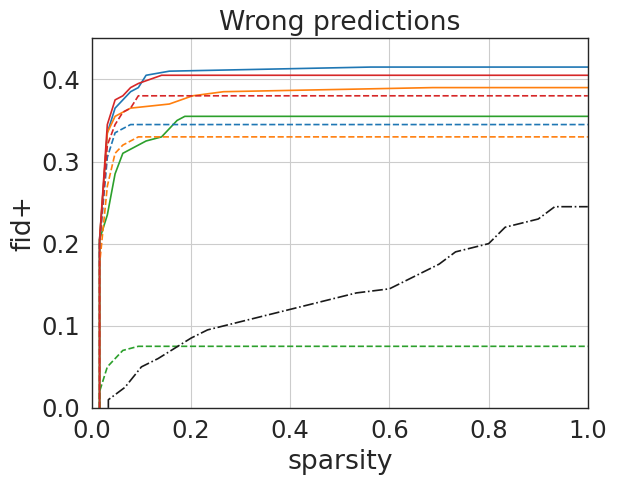

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(results_cody_1_delta_w_e_nec['sparsity_necessary'], results_cody_1_delta_w_e_nec['necessary explanation rate'], color='tab:blue')
ax.plot(results_cody_temporal_w_e_nec['sparsity_necessary'], results_cody_temporal_w_e_nec['necessary explanation rate'], color='tab:orange')
ax.plot(results_cody_random_w_e_nec['sparsity_necessary'], results_cody_random_w_e_nec['necessary explanation rate'], color='tab:green')
ax.plot(results_cody_spatio_temporal_w_e_nec['sparsity_necessary'], results_cody_spatio_temporal_w_e_nec['necessary explanation rate'], color='tab:red')

ax.plot(results_greedy_1_delta_w_e_nec['sparsity_necessary'], results_greedy_1_delta_w_e_nec['necessary explanation rate'], color='tab:blue', linestyle='dashed')
ax.plot(results_greedy_temporal_w_e_nec['sparsity_necessary'], results_greedy_temporal_w_e_nec['necessary explanation rate'], color='tab:orange', linestyle='dashed')
ax.plot(results_greedy_random_w_e_nec['sparsity_necessary'], results_greedy_random_w_e_nec['necessary explanation rate'], color='tab:green', linestyle='dashed')
ax.plot(results_greedy_spatio_temporal_w_e_nec['sparsity_necessary'], results_greedy_spatio_temporal_w_e_nec['necessary explanation rate'], color='tab:red', linestyle='dashed')

ax.plot(tgnnexplainer_w_e_nec['sparsity_necessary'], tgnnexplainer_w_e_nec['necessary explanation rate'], color='k', linestyle='-.')

ax.set_xlim([0, 1])
ax.set_ylim([0, 0.45])

ax.set_title('Wrong predictions')

plt.xlabel('sparsity')
plt.ylabel('fid+')

plt.grid(True)

tikzplotlib.save('../plots/fid_spar_ucim_wrong.tex')

plt.savefig('../plots/svg/fid_spar_ucim_wrong.svg')

plt.show()

### 2.1.2 $Fidelity_-$

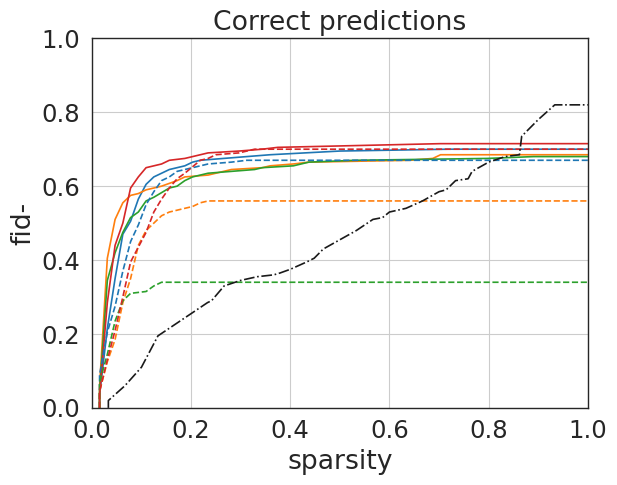

In [20]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(results_cody_1_delta_e_suf['sparsity_sufficient'], results_cody_1_delta_e_suf['sufficient explanation rate'], color='tab:blue')
ax.plot(results_cody_temporal_e_suf['sparsity_sufficient'], results_cody_temporal_e_suf['sufficient explanation rate'], color='tab:orange')
ax.plot(results_cody_random_e_suf['sparsity_sufficient'], results_cody_random_e_suf['sufficient explanation rate'], color='tab:green')
ax.plot(results_cody_spatio_temporal_e_suf['sparsity_sufficient'], results_cody_spatio_temporal_e_suf['sufficient explanation rate'], color='tab:red')

ax.plot(results_greedy_1_delta_e_suf['sparsity_sufficient'], results_greedy_1_delta_e_suf['sufficient explanation rate'], color='tab:blue', linestyle='dashed')
ax.plot(results_greedy_temporal_e_suf['sparsity_sufficient'], results_greedy_temporal_e_suf['sufficient explanation rate'], color='tab:orange', linestyle='dashed')
ax.plot(results_greedy_random_e_suf['sparsity_sufficient'], results_greedy_random_e_suf['sufficient explanation rate'], color='tab:green', linestyle='dashed')
ax.plot(results_greedy_spatio_temporal_e_suf['sparsity_sufficient'], results_greedy_spatio_temporal_e_suf['sufficient explanation rate'], color='tab:red', linestyle='dashed')

ax.plot(tgnnexplainer_e_suf['sparsity_sufficient'], tgnnexplainer_e_suf['sufficient explanation rate'], color='k', linestyle='-.')

ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

ax.set_title('Correct predictions')

plt.xlabel('sparsity')
plt.ylabel('fid-')

plt.grid(True)

tikzplotlib.save('../plots/fid_min_spar_ucim.tex')
plt.savefig('../plots/svg/fid_min_spar_ucim.svg')

plt.show()

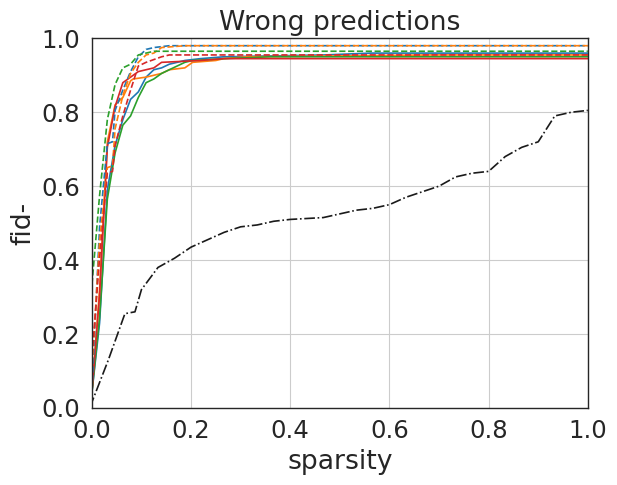

In [21]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(results_cody_1_delta_w_e_suf['sparsity_sufficient'], results_cody_1_delta_w_e_suf['sufficient explanation rate'], color='tab:blue')
ax.plot(results_cody_temporal_w_e_suf['sparsity_sufficient'], results_cody_temporal_w_e_suf['sufficient explanation rate'], color='tab:orange')
ax.plot(results_cody_random_w_e_suf['sparsity_sufficient'], results_cody_random_w_e_suf['sufficient explanation rate'], color='tab:green')
ax.plot(results_cody_spatio_temporal_w_e_suf['sparsity_sufficient'], results_cody_spatio_temporal_w_e_suf['sufficient explanation rate'], color='tab:red')

ax.plot(results_greedy_1_delta_w_e_suf['sparsity_sufficient'], results_greedy_1_delta_w_e_suf['sufficient explanation rate'], color='tab:blue', linestyle='dashed')
ax.plot(results_greedy_temporal_w_e_suf['sparsity_sufficient'], results_greedy_temporal_w_e_suf['sufficient explanation rate'], color='tab:orange', linestyle='dashed')
ax.plot(results_greedy_random_w_e_suf['sparsity_sufficient'], results_greedy_random_w_e_suf['sufficient explanation rate'], color='tab:green', linestyle='dashed')
ax.plot(results_greedy_spatio_temporal_w_e_suf['sparsity_sufficient'], results_greedy_spatio_temporal_w_e_suf['sufficient explanation rate'], color='tab:red', linestyle='dashed')

ax.plot(tgnnexplainer_w_e_suf['sparsity_sufficient'], tgnnexplainer_w_e_suf['sufficient explanation rate'], color='k', linestyle='-.')

ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

ax.set_title('Wrong predictions')

plt.xlabel('sparsity')
plt.ylabel('fid-')

plt.grid(True)

tikzplotlib.save('../plots/fid_min_spar_ucim_wrong.tex')

plt.savefig('../plots/svg/fid_min_spar_ucim_wrong.svg')

plt.show()

### 2.1.3 Convergent Analysis

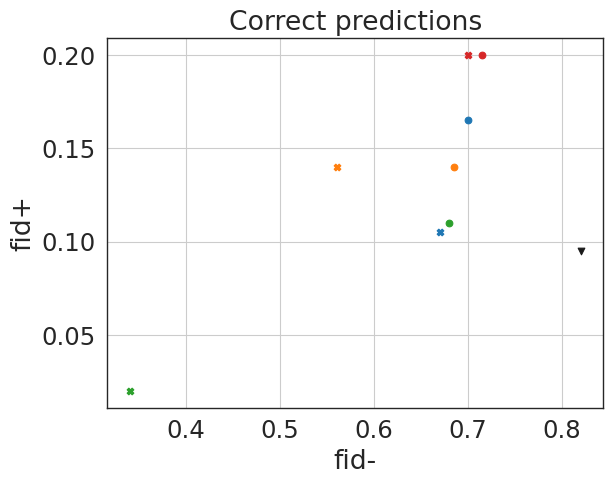

In [22]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for index, row in correct_predictions.iterrows():
    ax.scatter(row['fidelity_minus'], row['fidelity_plus'], c=selection_strategy_mapping[row['Selection strategy']], marker=explainer_mapping[row['Explainer']])

ax.set_title('Correct predictions')

plt.xlabel('fid-')
plt.ylabel('fid+')

plt.grid(True)

tikzplotlib.save('../plots/fid_plus_minus_ucim.tex')

plt.savefig('../plots/svg/fid_plus_minus_ucim.svg')

plt.show()

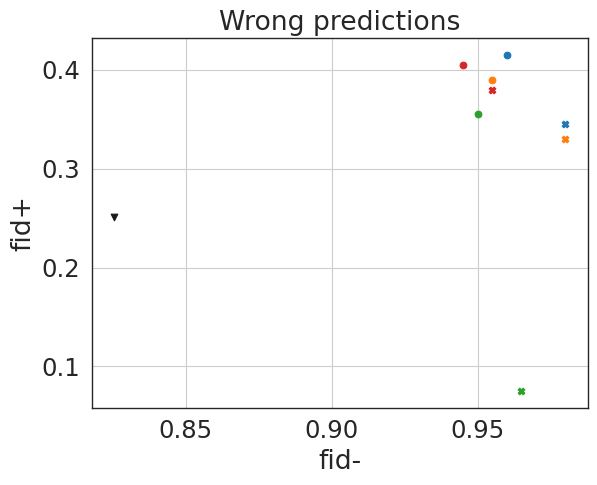

In [23]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for index, row in wrong_predictions.iterrows():
    ax.scatter(row['fidelity_minus'], row['fidelity_plus'], c=selection_strategy_mapping[row['Selection strategy']], marker=explainer_mapping[row['Explainer']])

ax.set_title('Wrong predictions')

plt.xlabel('fid-')
plt.ylabel('fid+')

plt.grid(True)

tikzplotlib.save('../plots/fid_plus_minus_ucim_wrong.tex')

plt.savefig('../plots/svg/fid_plus_minus_ucim_wrong.svg')

plt.show()

### 2.2. Runtime

/home/daniel/miniconda3/envs/analysis/lib/python3.9/site-packages/tikzplotlib/_hatches.py:65: UserWarning: tikzplotlib: Hatch '////' cannot be rendered. Only single character hatches are supported, e.g., {'/', '\', '|', '-', '+', 'x', 'o', 'O', '.', '*'}. Hatch '/' will be used.
  warnings.warn(


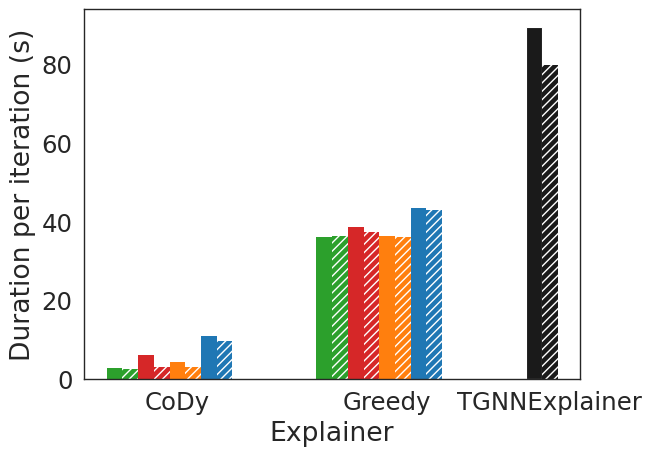

In [24]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

x = np.arange(2)

width = 0.075
multiplier = 0


for selection_strategy in [selection_strategy for selection_strategy in selection_strategy_mapping.keys() if selection_strategy != '-']:
    offset = width * multiplier
    durations = correct_predictions[correct_predictions['Selection strategy'] == selection_strategy]['Duration'].to_numpy()
    ax.bar(x + offset, durations, width, color=selection_strategy_mapping[selection_strategy], linewidth=0)
    multiplier += 1
    
    offset = width * multiplier
    durations = wrong_predictions[wrong_predictions['Selection strategy'] == selection_strategy]['Duration'].to_numpy()
    ax.bar(x + offset, durations, width, color=selection_strategy_mapping[selection_strategy], hatch='////', linewidth=0)
    multiplier += 1

ax.bar(2, tgnnex['total_duration'].mean()/1000000000, width, color='k')
ax.bar(2 + width, tgnnex_w['total_duration'].mean()/1000000000, width, color='k', hatch='////', linewidth=0)

ax.set_xticks((0.3, 1.3, 2.075), ('CoDy', 'Greedy', 'TGNNExplainer'))
ax.set_ylabel('Duration per iteration (s)')
ax.set_xlabel('Explainer')

tikzplotlib.save('../plots/duration_ucim.tex')

plt.savefig('../plots/svg/duration_ucim.svg')
    
plt.show()

### 2.4. Similarities

In [26]:
# Calculate the different similarity measures. This can take a while
results = [tgnnex, greedy_random, greedy_temporal, greedy_spatio_temporal, greedy_1_delta, cody_random, cody_temporal, cody_spatio_temporal, cody_1_delta]
precisions = np.zeros((len(results), len(results)))
recalls = np.zeros((len(results), len(results)))
f1s = np.zeros((len(results), len(results)))
jaccard_similarities = np.zeros((len(results), len(results)))
subset_accuracies = np.zeros((len(results), len(results)))
for index, result in enumerate(results):
    for inner_index, result_other in enumerate(results):
        precision, recall, f1, jaccard_similarity, subset_accuracy = calculate_similarity_scores(result, result_other)
        precisions[index][inner_index] = precision
        recalls[index][inner_index] = recall
        f1s[index][inner_index] = f1
        jaccard_similarities[index][inner_index] = jaccard_similarity
        subset_accuracies[index][inner_index] = subset_accuracy

results_w = [tgnnex_w, greedy_random_w, greedy_temporal_w, greedy_spatio_temporal_w, greedy_1_delta_w, cody_random_w, cody_temporal_w, cody_spatio_temporal_w, cody_1_delta_w]
precisions_w = np.zeros((len(results_w), len(results_w)))
recalls_w = np.zeros((len(results_w), len(results_w)))
f1s_w = np.zeros((len(results_w), len(results_w)))
jaccard_similarities_w = np.zeros((len(results_w), len(results_w)))
subset_accuracies_w = np.zeros((len(results), len(results)))
for index, result in enumerate(results_w):
    for inner_index, result_other in enumerate(results_w):
        precision, recall, f1, jaccard_similarity, subset_accuracy = calculate_similarity_scores(result, result_other)
        precisions_w[index][inner_index] = precision
        recalls_w[index][inner_index] = recall
        f1s_w[index][inner_index] = f1
        jaccard_similarities_w[index][inner_index] = jaccard_similarity
        subset_accuracies_w[index][inner_index] = subset_accuracy

In [27]:
labels = ['T-GNNExplainer', 'GreedyCF-random', 'GreedyCF-temporal', 'GreedyCF-spatio-temporal', 'GreedyCF-1-best', 'CoDy-random', 'CoDy-temporal', 'CoDy-spatio-temporal', 'CoDy-1-best']

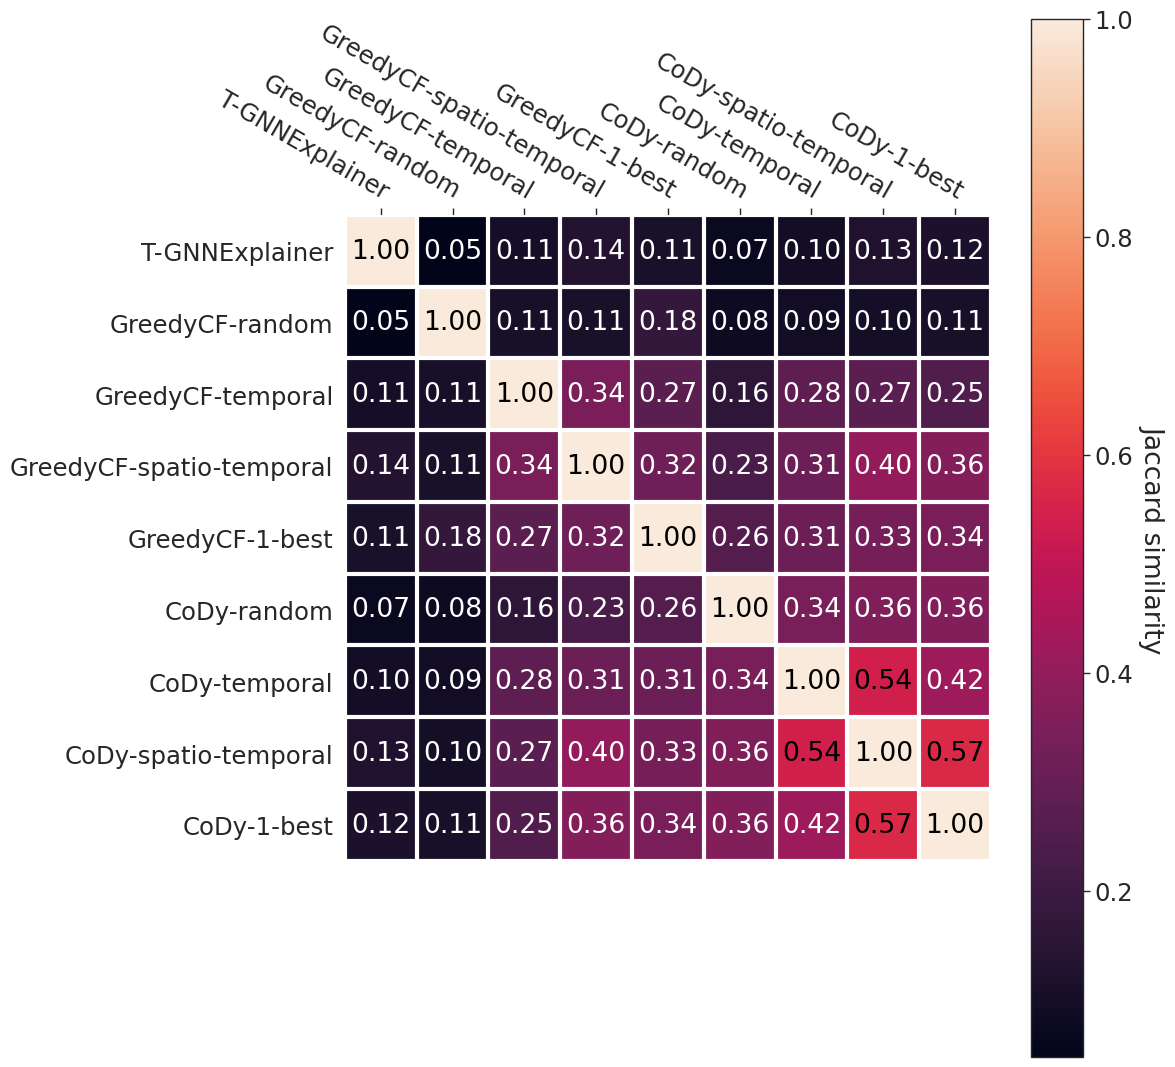

In [28]:
fig, ax = plt.subplots(figsize=(12,12))

im, cbar = heatmap(jaccard_similarities, labels, labels, ax=ax, cbarlabel="Jaccard similarity")
texts = annotate_heatmap(im, valfmt="{x:.2f}", textcolors=("white", "black"))

fig.tight_layout()

tikzplotlib.save('../plots/jaccard_similarity_ucim.tex')

plt.show()

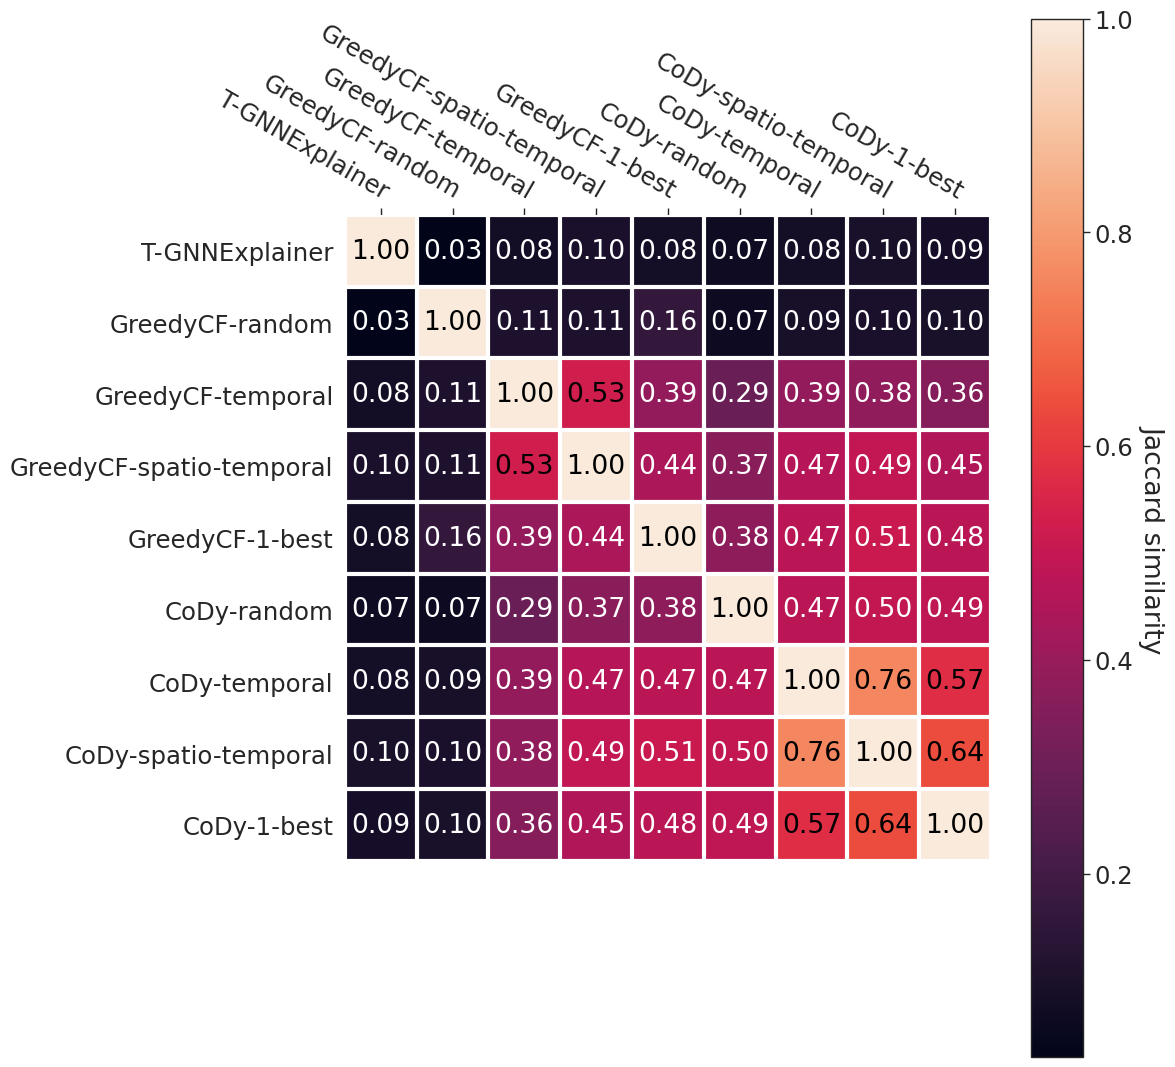

In [29]:
fig, ax = plt.subplots(figsize=(12,12))

im, cbar = heatmap(jaccard_similarities_w, labels, labels, ax=ax, cbarlabel="Jaccard similarity")
texts = annotate_heatmap(im, valfmt="{x:.2f}", textcolors=("white", "black"))

fig.tight_layout()

tikzplotlib.save('../plots/jaccard_similarity_ucim_w.tex')

plt.show()

## 3. Tabular Analysis

### 3.1. Performance Overview

In [30]:
correct_predictions[['Explainer', 'Selection strategy', 'fidelity_plus', 'fidelity_minus', 'characterization_score', 'AUFC_plus', 'AUFC_min']].to_csv('../tables/uci_correct.csv')
correct_predictions[['Explainer', 'Selection strategy', 'fidelity_plus', 'fidelity_minus', 'characterization_score', 'AUFC_plus', 'AUFC_min']]

,Explainer,Selection strategy,fidelity_plus,fidelity_minus,characterization_score,AUFC_plus,AUFC_min
0,TGNNExplainer,-,0.095,0.820,0.170273,0.052000,0.450447
0,Greedy,random,0.020,0.340,0.037778,0.019649,0.325664
1,Greedy,temporal,0.140,0.560,0.224000,0.133164,0.520821
2,Greedy,spatio-temporal,0.200,0.700,0.311111,0.188946,0.637578
3,Greedy,1-delta,0.105,0.670,0.181548,0.101914,0.624024
0,CoDy,random,0.110,0.680,0.189367,0.101641,0.626289
1,CoDy,temporal,0.140,0.685,0.232485,0.134532,0.635938
2,CoDy,spatio-temporal,0.200,0.715,0.312568,0.190547,0.670586
3,CoDy,1-delta,0.165,0.700,0.267052,0.158438,0.650156


In [31]:
wrong_predictions[['Explainer', 'Selection strategy', 'fidelity_plus', 'fidelity_minus', 'characterization_score', 'AUFC_plus', 'AUFC_min']].to_csv('../tables/uci_wrong.csv')
wrong_predictions[['Explainer', 'Selection strategy', 'fidelity_plus', 'fidelity_minus', 'characterization_score', 'AUFC_plus', 'AUFC_min']]

,Explainer,Selection strategy,fidelity_plus,fidelity_minus,characterization_score,AUFC_plus,AUFC_min
0,TGNNExplainer,-,0.251282,0.825641,0.385299,0.137583,0.525841
0,Greedy,random,0.075000,0.965000,0.139183,0.072656,0.948166
1,Greedy,temporal,0.330000,0.980000,0.493740,0.322149,0.950821
2,Greedy,spatio-temporal,0.380000,0.955000,0.543670,0.370626,0.925665
3,Greedy,1-delta,0.345000,0.980000,0.510340,0.337618,0.953985
0,CoDy,random,0.355000,0.950000,0.516858,0.341837,0.910000
1,CoDy,temporal,0.390000,0.955000,0.553829,0.376407,0.921498
2,CoDy,spatio-temporal,0.405000,0.945000,0.567000,0.394767,0.918164
3,CoDy,1-delta,0.415000,0.960000,0.579491,0.401915,0.919063


### 3.2. Export Scatter

In [34]:
correct_predictions['meta'] = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']
wrong_predictions['meta'] = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

correct_predictions[['meta', 'fidelity_plus', 'fidelity_minus']].to_csv('../tables/ucim_fid_correct.csv', index=None, header=['meta', 'fid_min', 'fid_pl'])
wrong_predictions[['meta', 'fidelity_plus', 'fidelity_minus']].to_csv('../tables/ucim_fid_wrong.csv', index=None, header=['meta', 'fid_min', 'fid_pl'])

In [35]:
correct_predictions['correct'] = True
wrong_predictions['correct'] = False

In [32]:
pd.concat((correct_predictions, wrong_predictions)).to_excel('../tables/ucim_full.xlsx')

In [34]:
pd.concat((results_cody_1_delta_w_e_nec, tgnnexplainer_w_e_nec, results_greedy_temporal_w_e_nec)).to_excel('../tables/ucim_expanded_wrong.xlsx')

In [33]:
pd.concat((results_cody_1_delta_e_nec, tgnnexplainer_e_nec, results_greedy_temporal_e_nec)).to_excel('../tables/ucim_expanded_correct.xlsx')

### 3.3. Runtime Overview

In [35]:
correct_runtime = correct_predictions[['Explainer', 'Selection strategy', 'avg_oracle_calls', 'initialisation (s)', 'explanation (s)', 'oracle calls (s)', 'Duration']]
correct_runtime['oracle_calls_pct'] = correct_runtime['oracle calls (s)']/correct_runtime['Duration']
correct_runtime['explanation_pct'] = correct_runtime['explanation (s)']/correct_runtime['Duration']

/tmp/ipykernel_104085/1218401292.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correct_runtime['oracle_calls_pct'] = correct_runtime['oracle calls (s)']/correct_runtime['Duration']
/tmp/ipykernel_104085/1218401292.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correct_runtime['explanation_pct'] = correct_runtime['explanation (s)']/correct_runtime['Duration']


In [36]:
correct_runtime

,Explainer,Selection strategy,avg_oracle_calls,initialisation (s),explanation (s),oracle calls (s),Duration,oracle_calls_pct,explanation_pct
0,TGNNExplainer,-,13650.305,0.043306,18.345683,71.092524,89.481513,0.794494,0.205022
0,Greedy,random,27.100,0.000067,0.005808,2.718943,2.724751,0.997868,0.002132
1,Greedy,temporal,43.700,0.000067,0.008894,4.343726,4.352619,0.997957,0.002043
2,Greedy,spatio-temporal,57.550,0.000065,0.015884,5.937899,5.953782,0.997332,0.002668
3,Greedy,1-delta,100.150,4.685193,0.026051,10.920750,10.946801,0.997620,0.002380
0,CoDy,random,287.910,0.000613,0.426529,35.633102,36.059631,0.988172,0.011828
1,CoDy,temporal,287.920,0.000506,0.780293,35.570363,36.350656,0.978534,0.021466
2,CoDy,spatio-temporal,287.950,0.000906,3.047462,35.582965,38.630427,0.921112,0.078888
3,CoDy,1-delta,346.500,0.051230,0.688419,42.876018,43.564437,0.984198,0.015802


In [37]:
wrong_runtime = wrong_predictions[['Explainer', 'Selection strategy', 'avg_oracle_calls', 'initialisation (s)', 'explanation (s)', 'oracle calls (s)', 'Duration']]
wrong_runtime['oracle_calls_pct'] = wrong_runtime['oracle calls (s)']/wrong_runtime['Duration']
wrong_runtime['explanation_pct'] = wrong_runtime['explanation (s)']/wrong_runtime['Duration']

/tmp/ipykernel_104085/3751994185.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wrong_runtime['oracle_calls_pct'] = wrong_runtime['oracle calls (s)']/wrong_runtime['Duration']
/tmp/ipykernel_104085/3751994185.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wrong_runtime['explanation_pct'] = wrong_runtime['explanation (s)']/wrong_runtime['Duration']


In [38]:
wrong_runtime

,Explainer,Selection strategy,avg_oracle_calls,initialisation (s),explanation (s),oracle calls (s),Duration,oracle_calls_pct,explanation_pct
0,TGNNExplainer,-,13685.138462,0.033350,15.837486,63.971158,79.841994,0.801222,0.198360
0,Greedy,random,23.400000,0.000067,0.005316,2.580313,2.585628,0.997944,0.002056
1,Greedy,temporal,29.850000,0.000067,0.006487,3.124489,3.130976,0.997928,0.002072
2,Greedy,spatio-temporal,29.400000,0.000066,0.007620,3.052164,3.059785,0.997510,0.002490
3,Greedy,1-delta,79.175000,4.960200,0.022350,9.572831,9.595181,0.997671,0.002329
0,CoDy,random,246.825000,0.000681,0.411111,35.993801,36.404912,0.988707,0.011293
1,CoDy,temporal,245.640000,0.000570,0.466625,35.587054,36.053679,0.987058,0.012942
2,CoDy,spatio-temporal,245.440000,0.001008,1.623039,35.731534,37.354573,0.956550,0.043450
3,CoDy,1-delta,292.225000,0.053163,0.453073,42.550996,43.004069,0.989464,0.010536
